[*********************100%***********************]  1 of 1 completed
(81,)


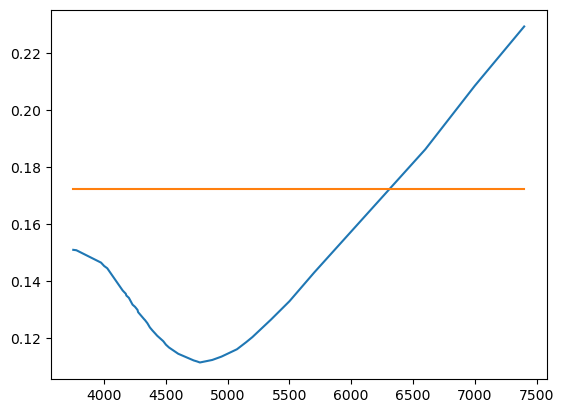

In [44]:
import numpy as np
from scipy.optimize import newton_krylov
from scipy.stats import norm
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import yfinance as yf

def compute_volatility(data, time_size):
    n = data.size
    result = np.zeros((n//time_size,))
    time = np.zeros((n//time_size,))
    i = 0
    for item in np.split(data, n//time_size):
        result[i] = np.sum(np.power(np.log(item[1:]) - np.log(item[:-1]), 2))
        time[i] = (time_size*(i+1) + time_size*i)/2.0
        result[i] = np.sqrt((result[i]/(time_size))*252)
        i += 1



    return result , time

def solve_implied_volatlity(S0, C, r, T, t, K):
    d1 = lambda sigma: (1/(sigma*np.sqrt(T-t)))*(np.log(S0/K) + (r+(sigma**2)/2)*(T-t))
    d2 = lambda sigma: d1(sigma) - sigma*np.sqrt(T-t)

    f = lambda s: (C - norm.cdf(d1(s))*S0 + norm.cdf(d2(s))*K*np.exp(-r*(T-t)))**2
    return minimize_scalar(f, bounds=(0.0001,2), method='bounded').x


data = np.loadtxt("SPX_option.txt")

start_time = '2022-11-11'

yahoo_data = yf.download('^GSPC', start=start_time, end='2023-03-13', interval='1d')

data_past = yahoo_data.loc[:,["Adj Close"]].to_numpy().squeeze()

r = 0.04
T = 123/252
S0 = 4137
t = 0
n,m = data.shape
# print(data.shape)
result = np.zeros((n,))
i = 0
for p in data:
    K, C = p
    result[i] = solve_implied_volatlity(S0, C, r, T, t, K)
    i +=1
print(data_past.shape)
vol,_ = compute_volatility(data_past,data_past.size)

plt.figure()
plt.plot(data[:,0],result)
plt.plot(data[:,0],[vol]*n)
plt.show()